# Computer Infrastructure Assessment

### Setup

Import required packages for effective operation of notebook

In [1]:
# Dates and times
import datetime as dt

# Data frames
import pandas as pd

# Yahoo finance data - yFinance (https://github.com/ranaroussi/yfinance)
import yfinance as yf

# Plots
import numpy as np

# Creating plots
import matplotlib.pyplot as plt

# Listing data files
import os


### Assessment Tasks

1. Write a function titled ``get_data()`` to download previous 5 day hourly data for the FAANG stocks and save into ``data`` folder, titled accordingly.
2. Plot the data for each stock, titling the function ``plot_data()``.
3. Write faang.py script to perform task 1 and 2.
4. Create GitHub Actions workflow to run script faang.yml every Saturday morning.

#### Problem 1. Funtion Creation

To create the ``get_data`` function, ``yf.download`` will be used, with different parameters specified, to align with the 5 day look back, and hourly data.

In [2]:
# Use yf.download to download hourly data over previos 5 days
#Source: https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download
get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h')

# Show first 5 lines of the results
get_data.head()

/tmp/ipykernel_23106/762086023.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h')
[*********************100%***********************]  5 of 5 completed


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-11 14:30:00+00:00  276.119995  230.880005  317.059998  652.609985   
2025-12-11 15:30:00+00:00  275.825012  228.850006  315.549988  646.609985   
2025-12-11 16:30:00+00:00  277.904999  230.082504  316.059998  648.840027   
2025-12-11 17:30:00+00:00  277.522614  229.479996  313.390015  649.390015   
2025-12-11 18:30:00+00:00  277.760010  229.844193  313.605011  651.919983   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-11 14:30:00+00:00  94.394997  279.579987  232.110001  321.989990   
2025-12-11 15:30:00+00:00  94.084999  276.589996  231.039993  317.890015   
2025-12-11 16:30:00+00:00  94.620003  278.179993  230.279999  316.540009   
2025-12-11 17:30:00+00:00  94.089996  278.350006  230.399002  316.543213   
2025-12-11 18:30:00+00:00  94.419899  278.209991  230.079407  314.559998   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
Datetime                                          ...                           
2025-12-11 14:30:00+00:00  655.280029  94.510002  ...  279.095001  230.710007   
2025-12-11 15:30:00+00:00  653.184998  94.680000  ...  276.114990  230.860001   
2025-12-11 16:30:00+00:00  649.719971  94.820000  ...  275.820007  228.889999   
2025-12-11 17:30:00+00:00  650.450012  94.769997  ...  277.920013  230.089996   
2025-12-11 18:30:00+00:00  653.414978  94.459999  ...  277.524994  229.479996   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
Datetime                                                                
2025-12-11 14:30:00+00:00  320.940002  642.729980  93.855003  6887208   
2025-12-11 15:30:00+00:00  317.075012  652.539978  94.394997  2343607   
2025-12-11 16:30:00+00:00  315.524994  646.710022  94.084999  2412367   
2025-12-11 17:30:00+00:00  316.057495  648.835022  94.612198  1473658   
2025-12-11 18:30:00+00:00  313.410004  649.340027  94.099998  1432317   

Price                                                          
Ticker                        AMZN     GOOG     META     NFLX  
Datetime                                                       
2025-12-11 14:30:00+00:00  4677750  3634473  2302563  9038298  
2025-12-11 15:30:00+00:00  2150176  1521142   990587  4362495  
2025-12-11 16:30:00+00:00  1738077  1109293   586515  3473366  
2025-12-11 17:30:00+00:00  1695827  2408094   651876  2643380  
2025-12-11 18:30:00+00:00  1454306  2208647   660057  2583434  

[5 rows x 25 columns]

The above code can be seen to pull the requested data for the 5 listed stock prices (Facebook, Apple, Amazon, Netflix, Google) over the previous 5 days with 1 hour intervals. This is listed with the earliest dates first, up to the most recent data for data at the end of the list. This can be seen in the below. 

In [3]:
# Show last 3 rows
get_data.tail(3)

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-17 16:30:00+00:00  272.869995  223.645004  301.204987  659.469971   
2025-12-17 17:30:00+00:00  273.019989  223.789993  300.750000  657.414978   
2025-12-17 18:30:00+00:00  272.834991  223.199997  299.928986  655.349976   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-17 16:30:00+00:00  95.805000  273.489990  224.189499  301.670013   
2025-12-17 17:30:00+00:00  95.714996  273.690002  224.550003  301.429993   
2025-12-17 18:30:00+00:00  95.510002  273.090088  223.759995  300.730011   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
Datetime                                          ...                           
2025-12-17 16:30:00+00:00  660.400024  95.949997  ...  273.489990  224.100006   
2025-12-17 17:30:00+00:00  661.229980  95.970001  ...  272.880005  223.654694   
2025-12-17 18:30:00+00:00  657.909973  95.779999  ...  272.990112  223.750000   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
Datetime                                                                
2025-12-17 16:30:00+00:00  299.980011  658.690002  95.760002  2372809   
2025-12-17 17:30:00+00:00  301.259888  659.432312  95.805000  1699122   
2025-12-17 18:30:00+00:00  300.709991  657.400024  95.709999   509661   

Price                                                           
Ticker                        AMZN     GOOG     META      NFLX  
Datetime                                                        
2025-12-17 16:30:00+00:00  2182029  1657174  2236910  18528193  
2025-12-17 17:30:00+00:00  5889856  1162097   833836   2263349  
2025-12-17 18:30:00+00:00   690093   301264   212313    676635  

[3 rows x 25 columns]

With the required information now downloaded, the following code can then be used to save it as per the required naming convention; ``YYYMMDD-HHmmss.csv``. To do this, the current time which is the same time as the script is ran, needs to be determined using ``datetime``.

In [4]:
# Use datetime module to confirm current time.
# Source: https://docs.python.org/3/library/datetime.html#format-codes
now = dt.datetime.now()

# Show output
now


datetime.datetime(2025, 12, 17, 18, 48, 43, 926722)

This now needs to be converted into a string, in the correct format using ``now.strftime`` ([Source](https://www.w3schools.com/python/python_datetime.asp)).

Per the format codes, the ``now`` datetime can be converted into a string using:
- %Y - for year
- %m - for month
- %d - for date of month
- %H - for hour (24 hour format)
- %M - for minute
- %S - for second

In [5]:
# Convert date and time into string.
now.strftime('%Y%m%d-%H%M%S')

'20251217-184843'

The above 2 codes can be merged for simplification, but still generating the exact time the code is ran, and capture it in a string format. 

In [6]:
# Capture date and time code is ran, and present as a string
time_stamp = dt.datetime.now().strftime('%Y%m%d-%H%M%S')

# Show
time_stamp

'20251217-184843'

This can then be expanded to be used as the filename, adding ``.csv`` at the end, along with specifying the location for the file to be saved using ``data/``.

``data/`` directs to the the data folder. The ``data`` folder is located in the root of the repository, which so too is this notebook and will also be ``faang.py`` so there is no need to direct the file up a level before specifying the data folder.

In [7]:
# File location is the 'data' folder, and will be a .csv file.
'data/' + dt.datetime.now().strftime('%Y%m%d-%H%M%S') + '.csv'

'data/20251217-184843.csv'

All this can now be pulled together, to save the previous 5 days for the given stocks.

In [8]:
# Pull previous 5 days of data
get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h', auto_adjust=True)

# Generate time stamp of when data was pulled and convert to string
time_stamp = dt.datetime.now().strftime('%Y%m%d-%H%M%S')

# Save into 'data' folder as a .csv file, titling file with time_stamp.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
get_data.to_csv('data/' + time_stamp + '.csv')

[*********************100%***********************]  5 of 5 completed


### Problem 2: Plotting the Data

To plot the data, the first step is to confirm the list of files in the 'data' folder. This can be done by using ``os.listdir`` and specifying the data folder path 

Source: https://www.geeksforgeeks.org/python/python-os-listdir-method/.

In [9]:
# Specify data folder as location to find the file.
#datadir = './data/'

# Specify the filename, which is the same time stamp as when the data is pulled.
#filename=f'{time_stamp}.csv'

In [10]:
# Read in the CSV file
#df= pd.read_csv(datadir + filename)

#show first 5 rows
#df.head()

In [11]:
data_files = os.listdir('./data/')

# Show
data_files

['20251209-185939.csv',
 '20251210-190038.csv',
 '20251213-092708.csv',
 '20251214-143835.csv',
 '20251217-184844.csv']

The above shows the list in the data folder, but to ensure the latest one is used for the plot, the ``.sort()`` ([source](https://www.geeksforgeeks.org/python/sort-in-python/)) will be used. Using ``reverse=True`` will arrange them in the most recent to the top.

In [12]:
# Sort the list of files.
data_files.sort(reverse=True)

# Show rearranged list.
data_files

['20251217-184844.csv',
 '20251214-143835.csv',
 '20251213-092708.csv',
 '20251210-190038.csv',
 '20251209-185939.csv']

Now it can be seen that the list has been arranged, it is possible to specify the first filename ``[0]``, which is the most recent.

Prior to doing the plot, a quick check can be done to ensure the information is being pulled in correctly.

In [13]:
# Specify first file in data_files group (index=0)
latest = data_files[0]

# Specify data folder as location to find the file.
datadir = './data/'

# Read in the CSV file
df= pd.read_csv(datadir + latest)

#show first 3 rows
df.head(3)

,Price,Close,Close.1,Close.2,Close.3,Close.4,High,High.1,High.2,High.3,...,Open,Open.1,Open.2,Open.3,Open.4,Volume,Volume.1,Volume.2,Volume.3,Volume.4
0,Ticker,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,...,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX
1,Datetime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-12-11 14:30:00+00:00,276.1199951171875,230.8800048828125,317.05999755859375,652.6099853515625,94.3949966430664,279.5799865722656,232.11000061035156,321.989990234375,655.280029296875,...,279.0950012207031,230.7100067138672,320.94000244140625,642.72998046875,93.8550033569336,6887208,4677750,3634473,2302563,9038298


The above is correct however, it can be seen that rows 0 and 1 are the headers, with row 2 being redundant. This needs to be factored into the ``read_csv`` command.

In [14]:
# Read in the CSV file
# header=[0,1] species the use of row 0 and 1 as the column names
# skiprows=[2] skips row 2
# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
df= pd.read_csv(datadir + latest, index_col=0, header=[0,1], skiprows=[2])

# Show first 3 rows
df.head(3)

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
2025-12-11 14:30:00+00:00  276.119995  230.880005  317.059998  652.609985   
2025-12-11 15:30:00+00:00  275.825012  228.850006  315.549988  646.609985   
2025-12-11 16:30:00+00:00  277.904999  230.082504  316.059998  648.840027   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
2025-12-11 14:30:00+00:00  94.394997  279.579987  232.110001  321.989990   
2025-12-11 15:30:00+00:00  94.084999  276.589996  231.039993  317.890015   
2025-12-11 16:30:00+00:00  94.620003  278.179993  230.279999  316.540009   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
2025-12-11 14:30:00+00:00  655.280029  94.510002  ...  279.095001  230.710007   
2025-12-11 15:30:00+00:00  653.184998  94.680000  ...  276.114990  230.860001   
2025-12-11 16:30:00+00:00  649.719971  94.820000  ...  275.820007  228.889999   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
2025-12-11 14:30:00+00:00  320.940002  642.729980  93.855003  6887208   
2025-12-11 15:30:00+00:00  317.075012  652.539978  94.394997  2343607   
2025-12-11 16:30:00+00:00  315.524994  646.710022  94.084999  2412367   

Price                                                          
Ticker                        AMZN     GOOG     META     NFLX  
2025-12-11 14:30:00+00:00  4677750  3634473  2302563  9038298  
2025-12-11 15:30:00+00:00  2150176  1521142   990587  4362495  
2025-12-11 16:30:00+00:00  1738077  1109293   586515  3473366  

[3 rows x 25 columns]

This is now correct, and can be used for the plot.

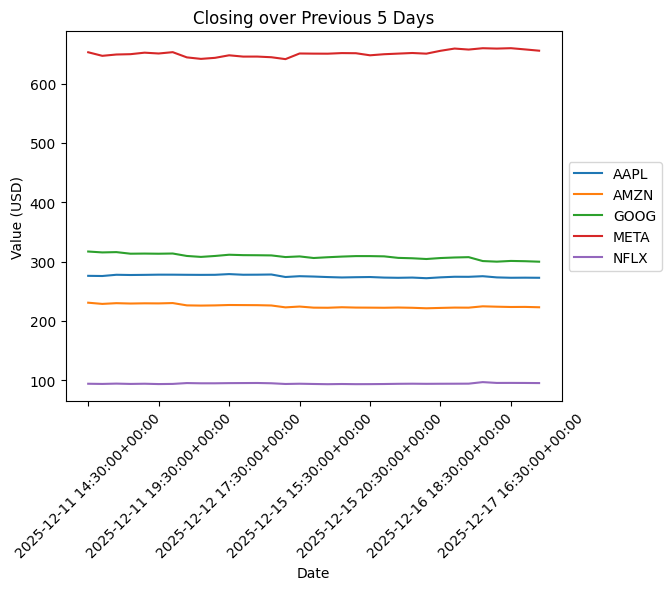

In [15]:
# Specify first file in data_files group (index=0)
latest = data_files[0]

# Specify data folder as location to find the file.
datadir = './data/'

# Read in the CSV file
df= pd.read_csv(datadir + latest, index_col=0, header=[0,1], skiprows=[2])

# Plot the 'close' data and adjust visuals.
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
plot_data = df['Close'].plot(title = 'Closing over Previous 5 Days', xlabel='Date', ylabel='Value (USD)')

# Rotate x-axis lables 45°
plt.xticks(rotation=45)

# Move legend off chart area
# Source: https://stackoverflow.com/questions/25068384/bbox-to-anchor-and-loc-in-matplotlib
plot_data.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plot file name using same time_stamp as data saving
filename = "./plots/" + time_stamp + ".png"

# Save figure.
plt.savefig(filename, dpi=500)

### Problem 3: Create Script

For the script, `faang.py` was created in the main repository. Within this, the above three codes were copied over:
- Firstly to pull the 5 day, hourly data for each of the stocks.
- The second to generate a timestamp of when the data was pulled.
- The third to save the data into the `data` folder.
- The fourth to create a plot and save into the plots folder.

To run each of these, specific packages are also needed, so these too were added to the `faang.py` code:
- `yfinance` to pull the required stock data.
- `datetime` to create the timestamp.
- `pandas` for data analysis
- `matplotlib.pyplot` for plot adjustments
- `matplotlib.mdates` to shorten z-axis titles

This results in the below, as can be seen in `faang.py`.

##### <u>_Running `faang.py`_</u>

This `faang.py` code can be ran as normal using `python faang.py` in the main terminal however, to have the code operate when the user types `./faang.py`, firstly a shebang line (`#! /usr/bin/env python`) needed to be added to the very beginning of the code.

By adding the shebang line, it specifies the path to Python and means the user does not have to type `python` before the script name [source](https://realpython.com/python-shebang/).

One final check to ensure the script functioned was to allow the file have permission to execute. To do so, in the same location where the `faang.py` script is located, in the terminal `chmod u+x faang.py` was ran. This changes the script to allow the user `u` to execute `x` the script.

To ensure this worked, `ls -l faang.py` was ran in the terminal. It outputted below, confimring it is executable given the `x` in `rwx`. 

```-rwxrw-rw- 1 codespace codespace 495 Nov  7 13:59 faang.py```

The script could then be ran in the terminal by simply typing `./faang.py`.

### Problem 4: Automation

Automating the `faang.py` code so that it runs and performs all the tasks is done throough GitHub actions ([source](https://docs.github.com/en/actions/get-started/quickstart)), but required setting up first.

Initially a folder called `.github` was created in the root of the repository, and within this another folder called `workflows`. This can be found ([Here](https://github.com/danielfinnerty/computer_infrastructure/tree/main/.github/workflows)).

Within the `workflows` folder, a file titled `faang.yml` was created. This is the file which contains the code required to correctly run the automation. The code itself was generated by AI based off several key prompts for tasks the code should do.

***
_I need to write a GitHub actions script in YAML. I want it to:_
1. _Clone my repository._
2. _Run a script called download.py_
3. _Commit all changes to the repo_
4. _Push those changes back to GitHub.com_
***
The ChatGPT promt can be found [Here](https://chatgpt.com/share/6936f40a-71ec-8012-a8ca-88a93364cfd3)

This code was added to the `faang.yml` file with several items updated:

- The cron, which determines the time and day in which the code is ran. In this case the cron schedule is `5 9 * * 6` which is 09:05 on every Saturday ([cron source](https://crontab.guru/#5_9_*_*_6))
- The name of the code which was required to be ran had to be corrected to the correct `faang.py`.

This now ensures the `faang.py` code, which pulls the 5 stock hourly values, saves into the `data` folder, creates a plot, and saves into the `plots` folder, occurs every Saturday morning and 9:05.



# End